# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 665


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city = city.replace(" ", "+")
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lon']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dicabisagan
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | san+cristobal
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | morehead
Processing Record 8 of Set 1 | te+anau
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | san+luis
Processing Record 11 of Set 1 | poso
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | broken+hill
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | port+elizabeth
Processing Record 18 of Set 1 | oksfjord
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | brezice
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | egvekinot
Processing Record 23 of Set 1 | monterey
Processing

Processing Record 37 of Set 4 | beringovskiy
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | minab
Processing Record 40 of Set 4 | kardailovo
Processing Record 41 of Set 4 | janakkala
Processing Record 42 of Set 4 | tidore
City not found. Skipping...
Processing Record 43 of Set 4 | salinopolis
Processing Record 44 of Set 4 | severo-yeniseyskiy
Processing Record 45 of Set 4 | marsh+harbour
Processing Record 46 of Set 4 | west+bay
Processing Record 47 of Set 4 | camocim
Processing Record 48 of Set 4 | cape+town
Processing Record 49 of Set 4 | pinawa
Processing Record 0 of Set 5 | bambous+virieux
Processing Record 1 of Set 5 | ulaanbaatar
Processing Record 2 of Set 5 | port+keats
Processing Record 3 of Set 5 | krivosheino
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | boa+vista
Processing Record 6 of Set 5 | dandong
Processing Record 7 of Set 5 | kurchum
Processing Record 8 of Set 5 | sfantu+gheorghe
Processing Record 9 of Set 5 | denpasar
Pr

Processing Record 28 of Set 8 | okha
Processing Record 29 of Set 8 | jieshi
Processing Record 30 of Set 8 | pochutla
Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | lorengau
Processing Record 35 of Set 8 | axim
Processing Record 36 of Set 8 | mamallapuram
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | stryn
Processing Record 39 of Set 8 | little+current
Processing Record 40 of Set 8 | nguru
Processing Record 41 of Set 8 | pierre
Processing Record 42 of Set 8 | mocuba
Processing Record 43 of Set 8 | goderich
Processing Record 44 of Set 8 | ewa+beach
Processing Record 45 of Set 8 | bilibino
Processing Record 46 of Set 8 | lasa
Processing Record 47 of Set 8 | ordu
Processing Record 48 of Set 8 | nanortalik
Processing Record 49 of Set 8 | alakurtti
Processing Record 0 of Set 9 | bubaque
Processing Record 1 of Set 9 | pietersburg
Pro

Processing Record 15 of Set 12 | ishigaki
Processing Record 16 of Set 12 | sibolga
Processing Record 17 of Set 12 | sohbatpur
Processing Record 18 of Set 12 | morden
Processing Record 19 of Set 12 | bandarbeyla
Processing Record 20 of Set 12 | surgut
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | lahij
Processing Record 23 of Set 12 | pangoa
Processing Record 24 of Set 12 | praia
Processing Record 25 of Set 12 | sault+sainte+marie
Processing Record 26 of Set 12 | mackenzie
Processing Record 27 of Set 12 | sungurlu
Processing Record 28 of Set 12 | vung+tau
Processing Record 29 of Set 12 | novi+sanzhary
Processing Record 30 of Set 12 | la+ligua
Processing Record 31 of Set 12 | tulun
Processing Record 32 of Set 12 | akdepe
Processing Record 33 of Set 12 | butembo
Processing Record 34 of Set 12 | ocean+city
Processing Record 35 of Set 12 | rio+gallegos
Processing Record 36 of Set 12 | walvis+bay
Processing Record 37 of Set 12 | linqiong
Processing Record 38 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          615
Lat           615
Lng           615
Max Temp      615
Humidity      615
Cloudiness    615
Wind Speed    615
Country       615
Date          615
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dicabisagan,122.4157,17.0818,28.24,73,81,1.98,PH,1670118687
1,atuona,-139.0333,-9.8000,25.37,78,2,6.65,PF,1670118837
2,thompson,-97.8558,55.7435,-27.91,76,20,2.06,CA,1670118838
3,saldanha,17.9442,-33.0117,14.03,75,53,8.72,ZA,1670118838
4,san+cristobal,-72.2250,7.7669,20.10,97,92,1.46,VE,1670118839


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dicabisagan,122.4157,17.0818,28.24,73,81,1.98,PH,1670118687
1,atuona,-139.0333,-9.8000,25.37,78,2,6.65,PF,1670118837
2,thompson,-97.8558,55.7435,-27.91,76,20,2.06,CA,1670118838
3,saldanha,17.9442,-33.0117,14.03,75,53,8.72,ZA,1670118838
4,san+cristobal,-72.2250,7.7669,20.10,97,92,1.46,VE,1670118839


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

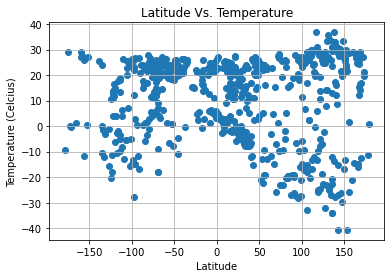

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('Latitude Vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celcius)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

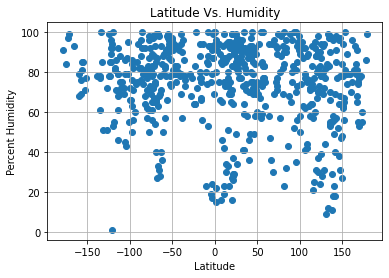

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title('Latitude Vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

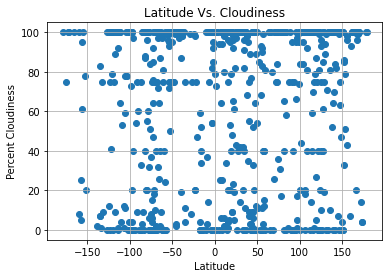

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Percent Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

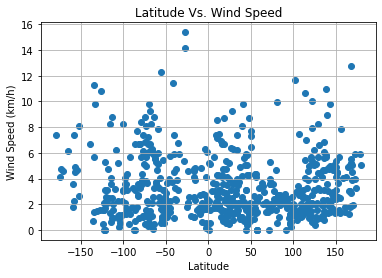

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.007710860686829559
The r-value is: 0.01477341103477503
The r-value is: 0.011016349827358721
The r-value is: 0.0023767128106700307


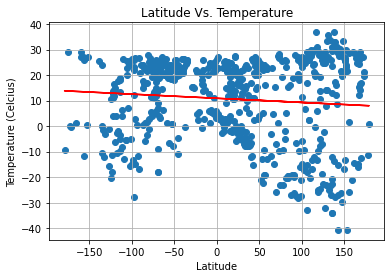

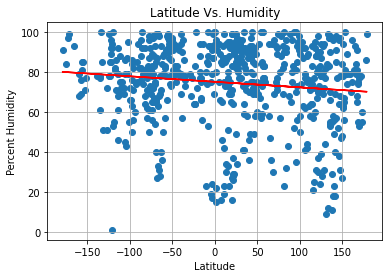

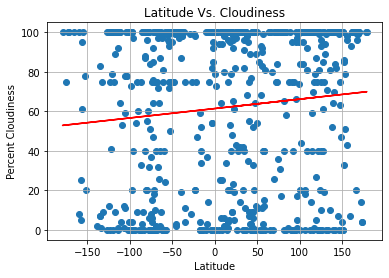

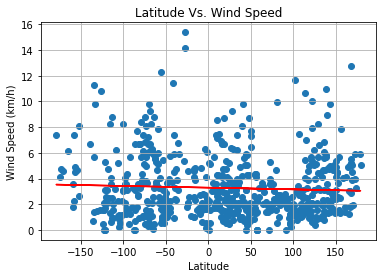

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = [city_data_df['Max Temp'], city_data_df['Humidity'],city_data_df['Cloudiness'], city_data_df['Wind Speed']]
ylabel = ['Temperature (Celcius)', 'Percent Humidity', 'Percent Cloudiness', 'Wind Speed (km/h)']
title = ['Latitude Vs. Temperature', 'Latitude Vs. Humidity', 'Latitude Vs. Cloudiness', 'Latitude Vs. Wind Speed']

for i in range(len(y_values)):
    def line_regress(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values[i])
        regress_values = x_values * slope + intercept
        
        fig, ax = plt.subplots()
        plt.scatter(x_values, y_values[i], marker='o')
        plt.plot(x_values, regress_values, "r-")
        
        plt.title(title[i])
        plt.xlabel('Latitude')
        plt.ylabel(ylabel[i])
        plt.grid(True)
        
        print(f"The r-value is: {rvalue**2}")
        
    line_regress(x_values, y_values)


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dicabisagan,122.4157,17.0818,28.24,73,81,1.98,PH,1670118687
3,saldanha,17.9442,-33.0117,14.03,75,53,8.72,ZA,1670118838
7,te+anau,167.7167,-45.4167,12.13,79,100,2.86,NZ,1670118840
8,mataura,168.8643,-46.1927,16.42,55,99,4.51,NZ,1670118840
10,poso,120.7524,-1.3959,29.10,67,100,1.06,ID,1670118841


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atuona,-139.0333,-9.8000,25.37,78,2,6.65,PF,1670118837
2,thompson,-97.8558,55.7435,-27.91,76,20,2.06,CA,1670118838
4,san+cristobal,-72.2250,7.7669,20.10,97,92,1.46,VE,1670118839
5,pisco,-76.2167,-13.7000,19.45,82,0,5.14,PE,1670118554
6,morehead,-87.1764,37.2711,0.55,76,0,0.00,US,1670118839


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.0009656758021666397


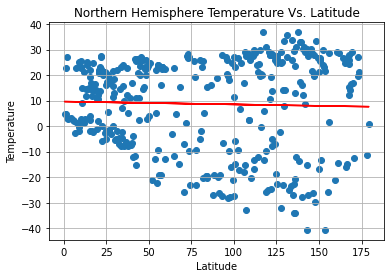

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Northern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.08


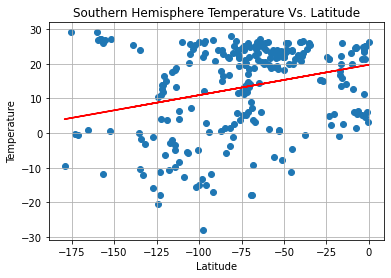

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Southern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:**

Cities the are near the equator will experience higher temperatures than anywhere else.
For the cities above the equator, you will notice that the temperatures start to drop. The opposite can be said about the cities in the southern hemisphere. 





### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00


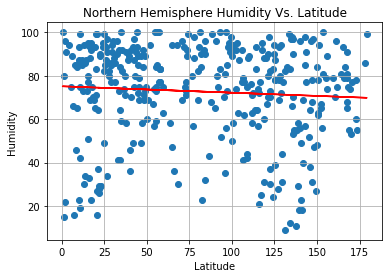

In [31]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Northern Hemisphere Humidity Vs. Latitude')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.00


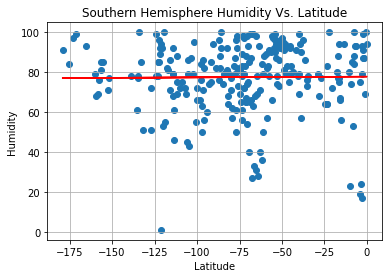

In [24]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Southern Hemisphere Humidity Vs. Latitude')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:** 

Both graphs, as well as their respected linear regression lines, show that there is not a distinctive relationship between the latitide of a city and the humidity percentage.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01


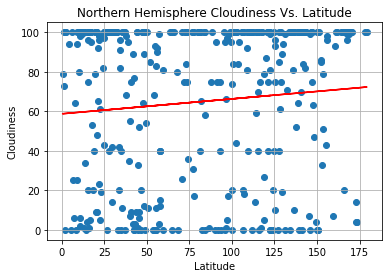

In [30]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Northern Hemisphere Cloudiness Vs. Latitude')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.00


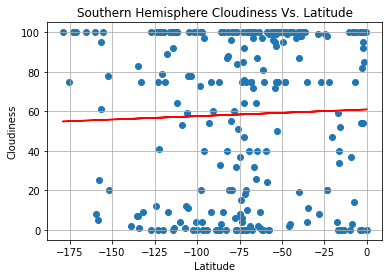

In [29]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Southern Hemisphere Cloudiness Vs. Latitude')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:** 
As indicated by the above graphs, the data is far too scattered to say that there is a direct correlation between the latitude of a city compared to the cloudiness of that city at the time. The amount of cloudiness changes day to day however the location of said city does not.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01


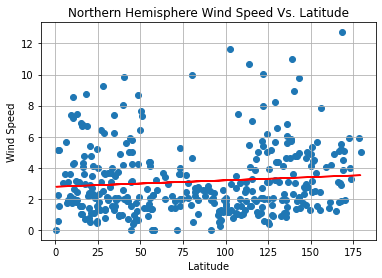

In [28]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Northern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed km/h')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.01


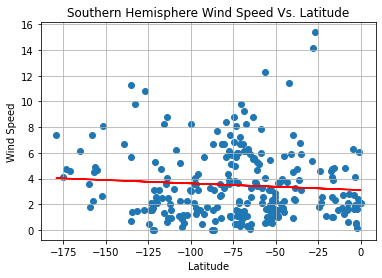

In [27]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.title('Southern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed kmn/h')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:** 
These graphs indicate that there is a possible correlation between the latitude and the wind speed in a given city. 
